# Programming Assignment 3
# <span style="font-family: Arial; color: #2e86c1; font-size: 25px;">Logistic Regression</span>

### <span style="font-family: Arial; color: darkslategray;">By: Beanca A. Manaog & Julian Gabrielo B. Sales</span>
### <span style="font-family: Arial; color: darkslategray;">Subject: ECE Electives 1 - Emerging Technologies</span>

<hr style="border: 1px solid #ccc;" />


<span style="color: green; font-weight: bold; font-size: large">Introduction</span>
#### In this assignment, we will train a model using Logistic Regression to classify breast tumor data from the Wisconsin Breast Cancer dataset. The dataset contains 699 instances, each characterized by attributes such as Clump Thickness, Uniformity of Cell Size, and Bare Nuclei. Our objective is to preprocess the data, remove missing values and unnecessary columns, convert tumor classes into binary labels, and analyze the model's performance to gain insights into tumor classification.

### <span style="color: #2e86c1; font-size: 20px;">Importing required libraries and modules </span>

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay  # Add this import
)
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

### <span style="color: #2e86c1; font-size: 20px;">Loading of Dataset </span>

In [28]:
# Load dataset
columns = [
    "ID", "Diagnosis", "Radius_mean", "Texture_mean", "Perimeter_mean", "Area_mean", "Smoothness_mean",
    "Compactness_mean", "Concavity_mean", "Concave_points_mean", "Symmetry_mean", "Fractal_dimension_mean",
    "Radius_se", "Texture_se", "Perimeter_se", "Area_se", "Smoothness_se", "Compactness_se",
    "Concavity_se", "Concave_points_se", "Symmetry_se", "Fractal_dimension_se", "Radius_worst",
    "Texture_worst", "Perimeter_worst", "Area_worst", "Smoothness_worst", "Compactness_worst",
    "Concavity_worst", "Concave_points_worst", "Symmetry_worst", "Fractal_dimension_worst"
]
df = pd.read_csv("wdbc.data", header=None, names=columns)

### <span style="color: #2e86c1; font-size: 20px;">Preprocessing of Data </span>

In [29]:
# Preprocess Data
df.drop(columns=["ID"], inplace=True)  # Remove "ID" column
df["Diagnosis"] = df["Diagnosis"].apply(lambda x: 1 if x == "M" else 0)  # Convert "Diagnosis"
df.dropna(inplace=True)  # Remove rows with missing values

In [30]:
import pandas as pd
from IPython.display import display, HTML

# Confirm the dataset
styled_df = df.head().style.set_table_attributes('style="width: 80%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}])
display(styled_df)

# Display the df.info() output centered
info_html = f"<pre>{df.info()}</pre>"
display(HTML(info_html))

,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,Fractal_dimension_mean,Radius_se,Texture_se,Perimeter_se,Area_se,Smoothness_se,Compactness_se,Concavity_se,Concave_points_se,Symmetry_se,Fractal_dimension_se,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,1,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,1,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,1,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,1,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius_mean              569 non-null    float64
 2   Texture_mean             569 non-null    float64
 3   Perimeter_mean           569 non-null    float64
 4   Area_mean                569 non-null    float64
 5   Smoothness_mean          569 non-null    float64
 6   Compactness_mean         569 non-null    float64
 7   Concavity_mean           569 non-null    float64
 8   Concave_points_mean      569 non-null    float64
 9   Symmetry_mean            569 non-null    float64
 10  Fractal_dimension_mean   569 non-null    float64
 11  Radius_se                569 non-null    float64
 12  Texture_se               569 non-null    float64
 13  Perimeter_se             569 non-null    float64
 14  Area_se                  5

### <span style="color: #2e86c1; font-size: 17px;">1. Split the samples into 70% Training and 30% Testing at random. </span>

In [31]:
# Split Data
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### <span style="color: #2e86c1; font-size: 17px;">2. Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and logistic regression.</span>

In [32]:
# Build Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

### <span style="color: #2e86c1; font-size: 17px;">3. Use the default penalty settings of Logistic Regression.  </span>

### <span style="color: #2e86c1; font-size: 17px;">4. After fitting the data, what is the model’s training and testing accuracy? Which features are most important?  </span>

In [33]:
# Evaluate Accuracy
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

# Create a DataFrame to display in a table
accuracy_df = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Testing Accuracy'],
    'Value': [f"{train_accuracy:.2f}", f"{test_accuracy:.2f}"]
})

# Style the DataFrame to center the content and hide the index
styled_accuracy_df = accuracy_df.style.set_table_attributes('style="width: 40%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]).hide(axis='index')

# Display the styled table
display(styled_accuracy_df)

Metric,Value
Training Accuracy,0.99
Testing Accuracy,0.97


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The model's training accuracy of 99% means it correctly classifies nearly all samples in the training dataset. This shows that the model has learned patterns from the data effectively. The testing accuracy of 97% indicates that the model generalizes well to new, unseen data without overfitting, making it reliable for practical applications.

In [34]:
# Extract the most important features
coef = pipeline.named_steps['logreg'].coef_[0]
important_features = pd.Series(coef, index=X.columns).sort_values(key=abs, ascending=False)

# Create a DataFrame for the top 5 most important features
top_5_features = important_features.head(5).reset_index()
top_5_features.columns = ['Feature', 'Coefficient']

# Style the DataFrame to center the content and hide the index
styled_top_5_features = top_5_features.style.set_table_attributes('style="width: 40%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]).hide(axis='index')

# Display the styled table
display(styled_top_5_features)

Feature,Coefficient
Texture_worst,1.384327
Radius_se,1.205130
Symmetry_worst,1.085744
Area_se,0.912114
Compactness_se,-0.904630


<span style="color: #B8860B; font-weight: bold">Insight:</span>

The importance of features highlights which attributes contribute most to the model's predictions. Texture_worst has the strongest positive influence, meaning higher values of this feature are closely associated with a malignant diagnosis. Similarly, Radius_se, Symmetry_worst, and Area_se positively impact predictions, suggesting their values increase the likelihood of a malignant outcome. On the other hand, Compactness_se has a negative influence, meaning higher values are more associated with benign diagnoses. By identifying these features, the model not only provides predictions but also offers insights into which biological characteristics are most critical for distinguishing cancer types, aiding in both diagnostic and research efforts.

### <span style="color: #2e86c1; font-size: 17px;">5. Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate.  </span>

<Figure size 600x500 with 0 Axes>

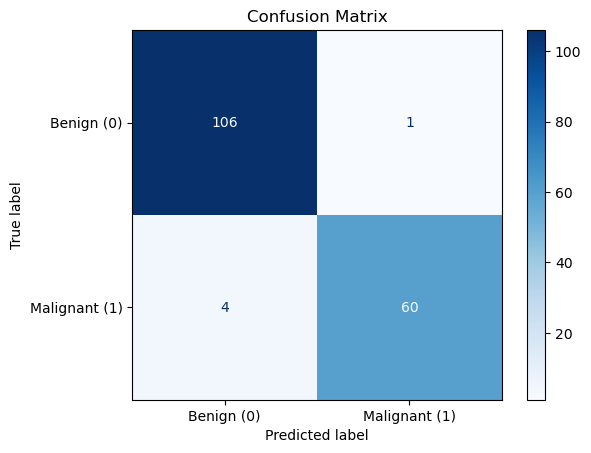

Metric,Value
Precision (Positive Predictive Value),0.98
Recall (Sensitivity or True Positive Rate),0.94
F1 Score (Harmonic Mean of Precision & Recall),0.96
False Alarm Rate (Type I Error Rate),0.01


In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix and Metrics
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix as a Heatmap
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Benign (0)", "Malignant (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

# Calculate Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
false_alarm_rate = conf_matrix[0][1] / (conf_matrix[0][1] + conf_matrix[0][0])

# Create a DataFrame to display the metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['Precision (Positive Predictive Value)', 
               'Recall (Sensitivity or True Positive Rate)', 
               'F1 Score (Harmonic Mean of Precision & Recall)', 
               'False Alarm Rate (Type I Error Rate)'],
    'Value': [f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}", f"{false_alarm_rate:.2f}"]
})

# Style the DataFrame to center the content and hide the index
styled_metrics_df = metrics_df.style.set_table_attributes('style="width: 40%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]).hide(axis='index')

# Display the styled table
display(styled_metrics_df)

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The model shows excellent performance with high precision (0.98) and recall (0.94). Precision means the model is very accurate in identifying malignant cases, with only 1 false positive. Recall indicates it successfully catches most malignant cases, missing only 4. The F1-score, a balance between precision and recall, is strong at 0.96. The false alarm rate is very low at 0.01, meaning it rarely misclassifies benign cases as malignant. Overall, the model is highly reliable for diagnosing breast cancer.

### <span style="color: #2e86c1; font-size: 17px;">6. Plot the ROC curve and report the AUC. For this item, make a result for both the training and testing data, separately. </span>

In [36]:
# ROC Curve and AUC Calculation
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

# Create a DataFrame for the AUC values
auc_df = pd.DataFrame({
    'Metric': ['Training AUC', 'Testing AUC'],
    'Value': [f"{train_auc:.2f}", f"{test_auc:.2f}"]
})

# Style the DataFrame to center the content and hide the index
styled_auc_df = auc_df.style.set_table_attributes('style="width: 40%; margin: auto;"').set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]).hide(axis='index')

# Display the styled table
display(styled_auc_df)

Metric,Value
Training AUC,1.00
Testing AUC,1.00


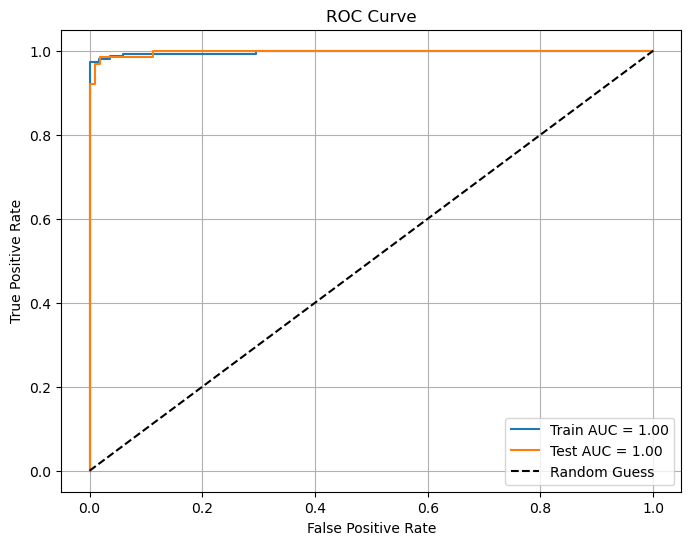

In [37]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f"Train AUC = {train_auc:.2f}")
plt.plot(test_fpr, test_tpr, label=f"Test AUC = {test_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

<span style="color: #B8860B; font-weight: bold">Insight:</span>

The ROC curve demonstrates that the model has exceptional predictive performance, with both the training and testing AUC (Area Under the Curve) equal to 1.00. This indicates that the model perfectly distinguishes between malignant and benign cases without any overlap in predictions. A straight diagonal line represents random guessing, but the model's curve stays near the top-left corner, showcasing its ability to achieve high true positive rates with minimal false positives. This performance suggests a highly effective and robust model for breast cancer classification.

In [38]:
# Summary Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



<span style="color: #B8860B; font-weight: bold">Insight:</span>

The classification report shows that the model performs exceptionally well, achieving 97% overall accuracy. For benign cases (class 0), it has a precision of 0.96, recall of 0.99, and an F1-score of 0.98, indicating minimal false negatives. For malignant cases (class 1), the precision is 0.98, recall is 0.94, and the F1-score is 0.96, reflecting strong detection with slightly higher false negatives. The macro and weighted averages of 0.97 confirm consistent performance across both classes, making the model highly reliable for breast cancer classification.

**Guide Questions**
### <span style="color: #2e86c1; font-size: 20px;">1. What steps are required to remove the "Sample code number" column?  </span>

To remove the "Sample code number" column, one can use Pandas in Python. First, load the dataset into a DataFrame using pd.read_csv(). Then, drop the column by calling df.drop(columns=["Sample code number"], inplace=True). Following these steps ensures that irrelevant identifiers do not affect the analysis or model training.

### <span style="color: #2e86c1; font-size: 20px;">2. How can the "Class" values be converted into binary (0 and 1) form in Python?  </span>

The "Class" column can be transformed by using Pandas' replace method. For instance, execute df['Class'] = df['Class'].replace({2: 0, 4: 1}) to map benign (2) to 0 and malignant (4) to 1. This conversion is essential because machine learning models require numerical data for binary classification tasks.

### <span style="color: #2e86c1; font-size: 20px;">3. What is the importance of splitting the dataset into training and testing sets?  </span>

Splitting the dataset ensures that the model is trained on one portion (training set) and evaluated on another (testing set) to assess its generalization ability. This prevents overfitting, where the model performs well on the training data but poorly on unseen data. It also provides a realistic measure of the model’s performance in real-world scenarios.


### <span style="color: #2e86c1; font-size: 20px;">4. Why is it necessary to use the stratify parameter in the train_test_split function?  </span>

Using stratify=y ensures that the proportion of classes (benign and malignant) remains consistent in both the training and testing sets. This prevents class imbalance, which could otherwise lead to biased models and inaccurate evaluation metrics, especially in datasets with unequal class distributions.

### <span style="color: #2e86c1; font-size: 20px;">5. What is logistic regression, and why is it suitable for this dataset?  </span>

Logistic regression is a statistical model used for binary classification tasks. It predicts the probability of an event belonging to one of two classes by modeling a sigmoid function. This dataset, which involves classifying tumors as benign or malignant, is well-suited for logistic regression due to its binary nature and relatively small number of features.

### <span style="color: #2e86c1; font-size: 20px;">6. How can the training and testing accuracy of the logistic regression model be calculated?  </span>

After fitting the logistic regression model on the training data, use the score() method in Python to calculate accuracy. For example, call model.score(X_train, y_train) for training accuracy and model.score(X_test, y_test) for testing accuracy. These metrics indicate how well the model predicts correct classifications for both sets.

### <span style="color: #2e86c1; font-size: 20px;">7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?  </span>

The importance of features can be assessed using the coefficients of the logistic regression model, available in model.coef_. Features with larger absolute coefficient values have a stronger influence on the classification decision. Additionally, domain knowledge and feature scaling can further validate their significance.

### <span style="color: #2e86c1; font-size: 20px;">8. How is a confusion matrix generated, and what does it represent?  </span>

A confusion matrix is generated using the confusion_matrix() function from sklearn.metrics, passing the true labels and predicted labels. It represents the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives. This helps in understanding the model’s accuracy, precision, recall, and error rates.


### <span style="color: #2e86c1; font-size: 20px;">9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?  </span>

Precision is calculated as the ratio of true positives to the sum of true positives and false positives. This metric measures the accuracy of positive predictions. Recall, on the other hand, is the ratio of true positives to the sum of true positives and false negatives, showing how well the model identifies actual positives. The F1-score is the harmonic mean of precision and recall, calculated as 2 times the product of precision and recall divided by the sum of precision and recall. This score balances the two metrics, offering a more comprehensive view of performance. Finally, the False Alarm Rate is calculated as the ratio of false positives to the sum of true negatives and false positives, indicating the proportion of benign cases misclassified as malignant.

### <span style="color: #2e86c1; font-size: 20px;">10. Why are these metrics important for evaluating the performance of a classifier?   </span>

These metrics provide a deeper understanding of the model’s strengths and weaknesses. Precision and recall address imbalanced data by focusing on positive predictions and actual positives, while the F1-score balances both. The false alarm rate shows the model’s reliability in avoiding incorrect positive predictions.

### <span style="color: #2e86c1; font-size: 20px;">11. What is an ROC curve, and how is it plotted for a logistic regression model?    </span>

An ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at different classification thresholds. For logistic regression, it is generated using the predicted probabilities, reflecting the model's ability to distinguish between classes across all thresholds.

### <span style="color: #2e86c1; font-size: 20px;">12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?   </span>

The AUC is the area under the ROC curve, calculated using integration. It represents the model’s ability to separate classes; a higher AUC (closer to 1) means better classification performance.

### <span style="color: #2e86c1; font-size: 20px;">13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?    </span>

If the training and testing ROC curves are similar and close to 1, it suggests the model generalizes well and performs consistently on unseen data. Significant differences indicate overfitting or underfitting.

### <span style="color: #2e86c1; font-size: 20px;">14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?    </span>

Challenges included handling missing data, converting categorical labels to numerical values, and scaling features. These were addressed by dropping incomplete records, mapping labels to binary values, and applying standardization through a pipeline.

### <span style="color: #2e86c1; font-size: 20px;">15. If the model's performance is not satisfactory, what adjustments could be made to improve it?    </span>

Improvements could include collecting more data, tuning hyperparameters, trying different models, using feature selection to focus on important variables, or addressing class imbalances with oversampling or weighting.